In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import pysal
import shapely.geometry
from shapely.geometry import Point

# Erster Import

In [6]:
#Importieren wir die vorgefertige Weltkarte
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

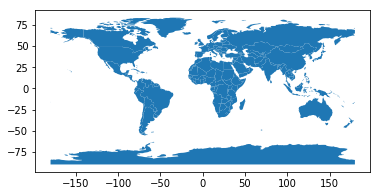

In [10]:
world.plot()

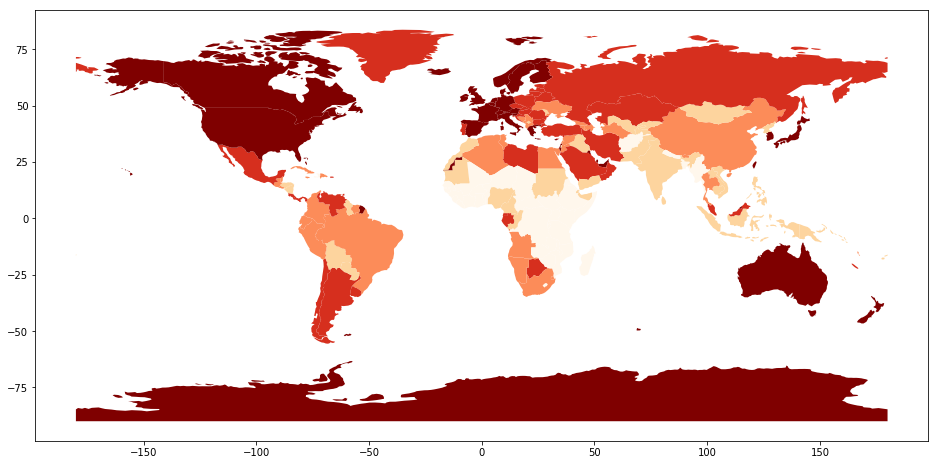

In [7]:
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles', figsize=(16, 20));

In [8]:
world.crs

{'init': 'epsg:4326'}

# Arbeiten wir mit der Schweiz

In [12]:
ch = gpd.read_file("shapePLZ/plz_verzeichnis_v2.shp")
#https://map.geo.admin.ch/?lang=en&topic=ech&bgLayer=ch.swisstopo.pixelkarte-farbe&layers=ch.swisstopo.zeitreihen,ch.bfs.gebaeude_wohnungs_register,ch.bav.haltestellen-oev,ch.swisstopo.swisstlm3d-wanderwege,ch.swisstopo.swissboundaries3d-gemeinde-flaeche.fill&layers_visibility=false,false,false,false,true&layers_timestamp=18641231,,,,&catalogNodes=457,510


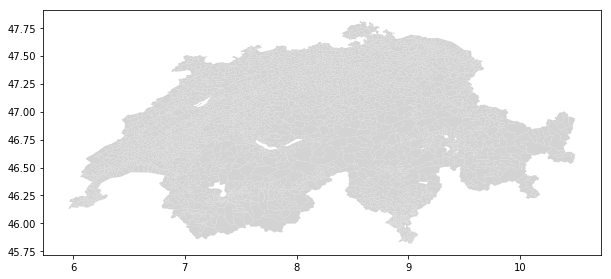

In [13]:
ch.plot(figsize=(10,10), color='lightgrey')
plt.savefig('switzerland.pdf')

In [15]:
# Step 1: Funktion, um einen Punkt zu machen
def make_point(row):
    return Point(row.Lng, row.Lat)
df = pd.read_csv('italrest_top10cities.csv')
# Step 2: Den Punkt machen
df['Points'] = df.apply(make_point, axis=1)

In [16]:
italrests = gpd.GeoDataFrame(df, geometry=list(df['Points']))

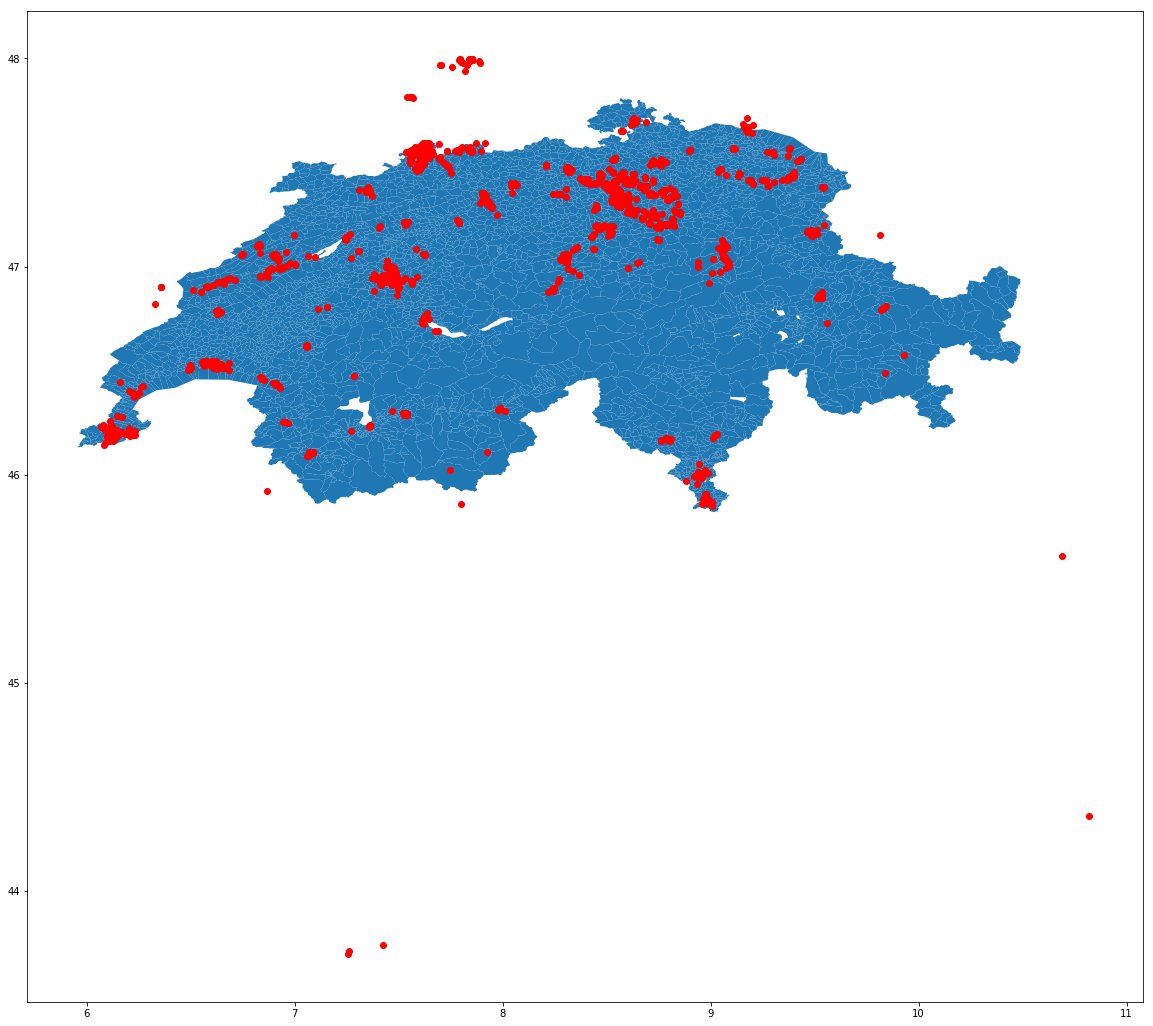

In [18]:
ax = ch.plot(figsize=(20,20))
italrests.plot(ax=ax, color='red')

In [19]:
italrests = italrests[italrests['Lat'] < 47.5]
italrests = italrests[italrests['Lat'] > 45]
italrests = italrests[italrests['Lng']>6]
italrests = italrests[italrests['Lng']<11]

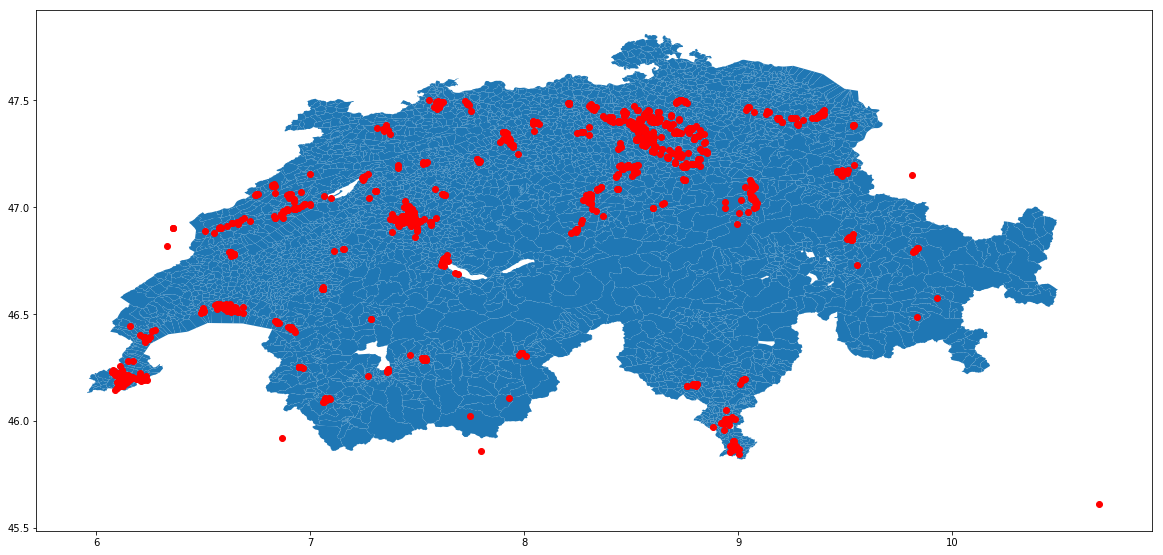

In [20]:
ax = ch.plot(figsize=(20,20))
italrests.plot(ax=ax, color='red')

In [21]:
ch.crs

{'init': 'epsg:4326'}

In [22]:
italrests.crs

In [23]:
italrests.crs = {'init' :'epsg:4326'}

In [26]:
ch.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 17 columns):
rec_art        5283 non-null object
onrp           5283 non-null float64
bfsnr          5283 non-null float64
plz_typ        5283 non-null float64
postleitzah    5283 non-null float64
plz_zz         5283 non-null object
gplz           5283 non-null float64
ortbez18       5283 non-null object
ortbez27       5283 non-null object
kanton         5283 non-null object
sprachcode     5283 non-null float64
sprachcode_    5283 non-null object
briefz_durc    5283 non-null float64
gilt_ab_dat    5283 non-null float64
plz_briefzu    5283 non-null float64
plz_coff       5283 non-null object
geometry       4134 non-null object
dtypes: float64(9), object(8)
memory usage: 701.7+ KB


In [31]:
ch = ch.dropna()

In [35]:
ch.to_crs(epsg=4326)

,rec_art,onrp,bfsnr,plz_typ,postleitzah,plz_zz,gplz,ortbez18,ortbez27,kanton,sprachcode,sprachcode_,briefz_durc,gilt_ab_dat,plz_briefzu,plz_coff,geometry
0,01,1519.0,6754.0,10.0,2340.0,00,2340.0,Le Noirmont,Le Noirmont,JU,2.0,,9046.0,19960919.0,234060.0,J,"POLYGON ((6.9436440414 47.2360068432, 6.944382..."
1,01,1522.0,6757.0,20.0,2354.0,00,2354.0,Goumois,Goumois,JU,2.0,,9046.0,19960919.0,234060.0,J,"POLYGON ((6.9459473802 47.2805882184, 6.945951..."
2,01,1525.0,707.0,20.0,2732.0,03,2732.0,Saules BE,Saules BE,BE,2.0,,1523.0,19990928.0,273200.0,J,"POLYGON ((7.228564203100001 47.2401886474, 7.2..."
3,01,1530.0,717.0,20.0,2735.0,02,2735.0,BÃ©vilard,BÃ©vilard,BE,2.0,,1523.0,19990507.0,273200.0,J,"POLYGON ((7.297006503 47.2187735659, 7.2964050..."
4,01,1538.0,716.0,20.0,2748.0,00,2748.0,Souboz,Souboz,BE,2.0,,7347.0,19881222.0,274060.0,J,"POLYGON ((7.295515880200001 47.2698711862, 7.2..."
5,01,1540.0,681.0,20.0,2744.0,00,2744.0,Belprahon,Belprahon,BE,2.0,,7347.0,20001030.0,274060.0,J,"POLYGON ((7.3934294594 47.2838428636, 7.393433..."
6,01,1542.0,694.0,20.0,2745.0,00,2745.0,Grandval,Grandval,BE,2.0,,7347.0,19860521.0,274060.0,J,"POLYGON ((7.435837706400001 47.261101554, 7.43..."
7,01,1543.0,691.0,10.0,2746.0,00,2746.0,CrÃ©mines,CrÃ©mines,BE,2.0,,7347.0,19860521.0,274060.0,J,"POLYGON ((7.446674836100001 47.2644397112, 7.4..."
8,01,1547.0,6720.0,20.0,2832.0,00,2832.0,Rebeuvelier,Rebeuvelier,JU,2.0,,1554.0,19960919.0,280060.0,J,"POLYGON ((7.4415055707 47.3099061007, 7.440538..."
9,01,1551.0,6711.0,20.0,2800.0,00,2800.0,DelÃ©mont,DelÃ©mont,JU,2.0,,1554.0,19960913.0,280060.0,J,"POLYGON ((7.3343515341 47.3491878397, 7.334018..."


In [37]:
italrests.to_crs(epsg=4326)

,Unnamed: 0,Addresse,Lat,Lng,Name,Rating,Points,geometry
0,0,"In Gassen 6, 8001 Zürich, Switzerland",47.370705,8.540779,Bindella,4.3,POINT (8.5407788 47.3707055),POINT (8.5407788 47.3707055)
1,1,"Augustinergasse 25, 8001 Zürich, Switzerland",47.372218,8.538797,Cantinetta Antinori,4.3,POINT (8.5387974 47.37221760000001),POINT (8.5387974 47.37221760000001)
2,2,"Dufourstrasse 1, 8008 Zürich, Switzerland",47.364525,8.547443,Conti,4.3,POINT (8.547442799999999 47.364525),POINT (8.547442799999999 47.364525)
3,3,"Nansenstrasse 9, 8050 Zürich, Switzerland",47.410710,8.544784,Mamma Mia,3.9,POINT (8.544783899999999 47.41071029999999),POINT (8.544783899999999 47.41071029999999)
4,4,"Zeughausstrasse 61, 8004 Zürich, Switzerland",47.376371,8.529278,Italia,4.3,POINT (8.529277699999998 47.3763708),POINT (8.529277699999998 47.3763708)
5,5,"Luisenstrasse 40, 8005 Zürich, Switzerland",47.384228,8.530403,Cucina,4.2,POINT (8.530403 47.384228),POINT (8.530403 47.384228)
6,6,"Ohmstrasse 11, 8050 Zürich, Switzerland",47.410185,8.545875,Concerto,4.2,POINT (8.545874999999999 47.41018520000001),POINT (8.545874999999999 47.41018520000001)
7,7,"Stampfenbachstrasse 8, 8001 Zürich, Switzerland",47.377759,8.543813,Commihalle,4.1,POINT (8.543813 47.377759),POINT (8.543813 47.377759)
8,8,"Niederdorfstrasse 33, 8001 Zürich, Switzerland",47.374671,8.543708,Tre Cucine,3.8,POINT (8.543707800000002 47.3746714),POINT (8.543707800000002 47.3746714)
9,9,"Waaggasse 5/7, 8001 Zürich, Switzerland",47.370103,8.539890,Santa Lucia,4.1,POINT (8.539889500000001 47.3701028),POINT (8.539889500000003 47.3701028)


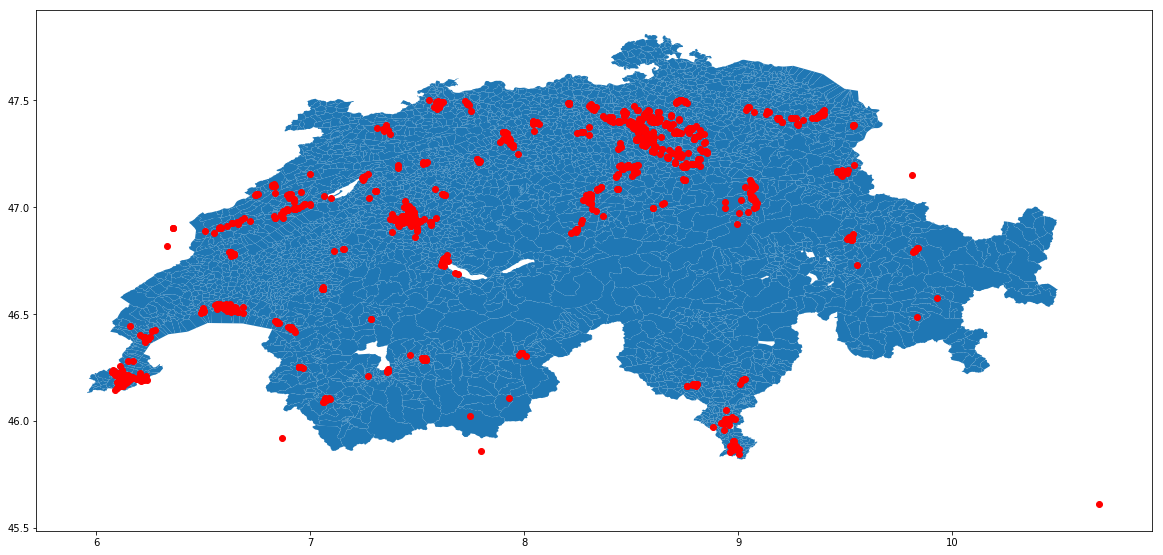

In [38]:
ax = ch.plot(figsize=(20,20))
italrests.plot(ax=ax, color='red')

In [41]:
ch

,rec_art,onrp,bfsnr,plz_typ,postleitzah,plz_zz,gplz,ortbez18,ortbez27,kanton,sprachcode,sprachcode_,briefz_durc,gilt_ab_dat,plz_briefzu,plz_coff,geometry
0,01,1519.0,6754.0,10.0,2340.0,00,2340.0,Le Noirmont,Le Noirmont,JU,2.0,,9046.0,19960919.0,234060.0,J,"POLYGON ((6.9436440414 47.2360068432, 6.944382..."
1,01,1522.0,6757.0,20.0,2354.0,00,2354.0,Goumois,Goumois,JU,2.0,,9046.0,19960919.0,234060.0,J,"POLYGON ((6.9459473802 47.2805882184, 6.945951..."
2,01,1525.0,707.0,20.0,2732.0,03,2732.0,Saules BE,Saules BE,BE,2.0,,1523.0,19990928.0,273200.0,J,"POLYGON ((7.2285642031 47.2401886474, 7.228489..."
3,01,1530.0,717.0,20.0,2735.0,02,2735.0,BÃ©vilard,BÃ©vilard,BE,2.0,,1523.0,19990507.0,273200.0,J,"POLYGON ((7.297006503 47.2187735659, 7.2964050..."
4,01,1538.0,716.0,20.0,2748.0,00,2748.0,Souboz,Souboz,BE,2.0,,7347.0,19881222.0,274060.0,J,"POLYGON ((7.2955158802 47.2698711862, 7.294448..."
5,01,1540.0,681.0,20.0,2744.0,00,2744.0,Belprahon,Belprahon,BE,2.0,,7347.0,20001030.0,274060.0,J,"POLYGON ((7.3934294594 47.2838428636, 7.393433..."
6,01,1542.0,694.0,20.0,2745.0,00,2745.0,Grandval,Grandval,BE,2.0,,7347.0,19860521.0,274060.0,J,"POLYGON ((7.4358377064 47.261101554, 7.4355641..."
7,01,1543.0,691.0,10.0,2746.0,00,2746.0,CrÃ©mines,CrÃ©mines,BE,2.0,,7347.0,19860521.0,274060.0,J,"POLYGON ((7.4466748361 47.2644397112, 7.446585..."
8,01,1547.0,6720.0,20.0,2832.0,00,2832.0,Rebeuvelier,Rebeuvelier,JU,2.0,,1554.0,19960919.0,280060.0,J,"POLYGON ((7.4415055707 47.3099061007, 7.440538..."
9,01,1551.0,6711.0,20.0,2800.0,00,2800.0,DelÃ©mont,DelÃ©mont,JU,2.0,,1554.0,19960913.0,280060.0,J,"POLYGON ((7.3343515341 47.3491878397, 7.334018..."


In [51]:
italrestswithPLZ = gpd.sjoin(italrests, ch, how="inner", op='intersects')

In [57]:
italrestswithPLZ.groupby('kanton')['Rating'].mean().sort_values(ascending=False)

kanton
FL    4.525000
OW    4.395000
TG    4.300000
TI    4.259770
ZH    4.258491
JU    4.250000
SG    4.246739
BL    4.245161
ZG    4.244068
SO    4.241667
SZ    4.239130
FR    4.230000
AR    4.200000
NW    4.200000
VS    4.196429
NE    4.179730
GL    4.170455
GE    4.160937
LU    4.153846
GR    4.142857
AG    4.132500
BE    4.107821
VD    4.010000
Name: Rating, dtype: float64

In [58]:
italrestswithPLZ.groupby('kanton')['Rating'].count().sort_values(ascending=False)

kanton
ZH    318
BE    179
VD    130
GE    128
SG     92
TI     87
AG     80
NE     74
ZG     59
VS     56
LU     52
GL     44
BL     31
GR     28
SO     24
SZ     23
OW     20
JU     18
FR     10
FL      4
NW      3
AR      3
TG      1
Name: Rating, dtype: int64